In [ ]:
# Updatek depek
%pip install seaborn --upgrade

In [1]:
import pandas as pd
from ipywidgets import interactive, Dropdown, IntSlider, Button, Box, Label, HTML
from IPython.display import display, clear_output

In [2]:
from core.analysis.salary import SalaryPlots
from core.analysis.attrition import AttritionPlots
from core.analysis.distance_from_home import DistanceFromHomePlots
from core.analysis.education import EducationPlots
from core.analysis.experience import ExperiencePlots

In [ ]:
class StatApp:
    def __init__ (self):
        self.df = pd.read_csv('../dataset-normalized.csv')
        self.job_roles = self.df['JobRole'].unique()
        self.job_levels = self.df['JobLevel'].unique()
        self.available_job_levels = []
        self.min_salary = 0
        self.max_salary = 0
        self.min_age = 0
        self.max_age = 0
        self.genders = self.df['Gender'].unique()

        self.salary = SalaryPlots(self.df)
        self.attrition = AttritionPlots(self.df)
        self.distance_from_home = DistanceFromHomePlots(self.df)
        self.education = EducationPlots(self.df)
        self.experience = ExperiencePlots(self.df)
        
        self.state = {
            'jobRoleDropdown': None,
            'jobLevelDropdown': None,
            'genderDropdown': None,
            'salarySlider': None,
            'ageSlider': None
        }
        
        self.layout = {
            'jobRoleDropdown': None,
            'jobLevelDropdown': None,
            'genderDropdown': None,
            'salarySlider': None,
            'ageSlider': None,
            'btnPlotSalary': None,
            'btnPlotGender': None,
            'btnPlotAge': None,
            'btnPlotAttrition': None,
            'btnPlotAttritionRankings': None
        }
        
    def find_layout_element (self, target):
        for key, value in self.layout.items():
            if value == target:
                return key
    
    def handle_change (self, data):
        target = self.find_layout_element(data.owner)
        
        if target is not None:
            self.state[target] = data.new

        if data.owner == self.layout['jobRoleDropdown']:
            self.available_job_levels = self.df.loc[self.df['JobRole'] == data.new]['JobLevel'].unique()
            self.min_salary = self.df.loc[self.df['JobRole'] == data.new]['MonthlyIncome'].min()
            self.max_salary = self.df.loc[self.df['JobRole'] == data.new]['MonthlyIncome'].max()
            self.min_age = self.df.loc[self.df['JobRole'] == data.new]['Age'].min()
            self.max_age = self.df.loc[self.df['JobRole'] == data.new]['Age'].max()
            self.state['jobLevelDropdown'] = None
            self.render()
            
    def plot_salary (self, _data):
        self.render()
        self.salary.plot_salary(
            self.state['salarySlider'],
            self.state['jobRoleDropdown'],
            self.state['jobLevelDropdown']
        )
        
    def plot_salary_age (self, _data):
        self.render()
        self.salary.plot_salary_vs_age(
            self.state['salarySlider'],
            self.state['jobRoleDropdown'],
            self.state['ageSlider']
        )
        
    def plot_salary_gender (self, _data):
        self.render()
        self.salary.plot_salary_vs_gender(
            self.state['salarySlider'],
            self.state['jobRoleDropdown'],
            self.state['genderDropdown']
        )
    
    def plot_attrition (self, _data):
        self.render()
        self.attrition.plot_attrition(
            self.state['jobRoleDropdown'],
            self.state['jobLevelDropdown']
        )

    def plot_attrition_rankings (self, _data):
        self.render()
        self.attrition.attrition_rankings(
            self.state['jobRoleDropdown']
        )

    def render (self):
        clear_output()
        
        labels = [
            Label('For Salary vs Job Role fill: salary, job role, job level'),
            Label('For Salary vs Gender fill: salary, job role, gender'),
            Label('For Salary vs Age fill: salary, job role, age'),
            Label('For Attrition, Job Role fill: job role, job level'),
            Label('For Attrition Rankings fill: job role')
        ]

        self.layout['jobRoleDropdown'] = Dropdown(
            options=self.job_roles,
            description='Job Role:',
            value=self.state['jobRoleDropdown']
        )
        self.layout['jobLevelDropdown'] = Dropdown(
            options=self.available_job_levels,
            description='Job Level:',
            disabled=len(self.available_job_levels) == 0,
            value=self.state['jobLevelDropdown']
        )
        self.layout['genderDropdown'] = Dropdown(
            options=[None, *self.genders],
            description='Gender:',
            disabled=len(self.genders) == 0,
            value=self.state['genderDropdown']
        )
        self.layout['salarySlider'] = IntSlider(
            value=self.state['salarySlider'],
            min=self.min_salary,
            max=self.max_salary,
            step=1,
            description='Salary:',
            disabled=self.state['jobRoleDropdown'] == None
        )
        self.layout['ageSlider'] = IntSlider(
            value=self.state['ageSlider'],
            min=self.min_age,
            max=self.max_age,
            step=1,
            description='Age:',
            disabled=self.state['jobRoleDropdown'] == None
        )
        self.layout['btnPlotSalary'] = Button(
            description='Salary vs Job Role',
            disabled=False,
            button_style='info',
            tooltip='Plot Salary vs Job Role & Job Level',
            icon='check'
        )
        self.layout['btnPlotGender'] = Button(
            description='Salary vs Gender',
            disabled=False,
            button_style='info',
            tooltip='Plot Salary vs Job Role & Gender',
            icon='check'
        )
        self.layout['btnPlotAge'] = Button(
            description='Salary vs Age',
            disabled=False,
            button_style='info',
            tooltip='Plot Salary vs Job Role & Age',
            icon='check'
        )
        self.layout['btnPlotAttrition'] = Button(
            description='Attrition, Job Role',
            disabled=False,
            button_style='info',
            tooltip='Attrition, Job Role, Job Level',
            icon='check'
        )
        self.layout['btnPlotAttritionRankings'] = Button(
            description='Attrition Rankings',
            disabled=False,
            button_style='info',
            tooltip='Attrition Rankings',
            icon='check'
        )
        
        self.layout['btnPlotSalary'].on_click(self.plot_salary)
        self.layout['btnPlotGender'].on_click(self.plot_salary_gender)
        self.layout['btnPlotAge'].on_click(self.plot_salary_age)
        self.layout['btnPlotAttrition'].on_click(self.plot_attrition)
        self.layout['btnPlotAttritionRankings'].on_click(self.plot_attrition_rankings)

        for key in self.layout.keys():
            self.layout[key].observe(self.handle_change, names='value')

        layout = []
        labels_i = 0
        
        for key in self.layout.keys():
            layout.append(self.layout[key])
            
            if key.startswith('btn'):
                layout.append(labels[labels_i])
                labels_i += 1
            
        display(*layout)
        
app = StatApp()

app.render()

# salary.plot_salary
# salary: int, job_role: str, job_lvl: int

# salary.plot_salary_vs_age
# salary: int, job_role: str, age: num = None

# salary.plot_salary_vs_gender
# salary: int, job_role: str, gender=None)

# StatApp().salary.plot_salary_vs_gender(8300, 'Manufacturing Director')

# attrition.plot_attrition
# job_role: str, job_level: int

# attrition.attrition_rankings
# job_role: str

# StatApp().attrition.attrition_rankings('Laboratory Technician')


# StatApp().distance_from_home.plot_distance(20, 'Female', 4)

# StatApp().education.plot_satisfaction_education(2, 3, 4, 'Medical', 5)
# StatApp().education.plot_satisfaction_education(2, 3, 4, 'Human Resources', 1)
# StatApp().education.plot_eductaion_salary(3300, 'Marketing', 5)
# StatApp().education.plot_eductaion_job_level(2, 'Marketing', 5)
# StatApp().education.plot_attrition('Medical', 5)
# StatApp().education.plot_attrition('Medical', 4)
# StatApp().education.plot_education_overtme('Medical', 5)

# StatApp().experience.plot_total_working_years_salary_dep(3500, 8, 1)

In [ ]:
class DistanceStatApp:
    def __init__ (self):
        self.df = pd.read_csv('../dataset-normalized.csv')
        self.genders = self.df['Gender'].unique()
        self.min_distance_from_home = self.df['DistanceFromHome'].min()
        self.max_distance_from_home = self.df['DistanceFromHome'].max()
        self.min_years_at_company = self.df['YearsAtCompany'].min()
        self.max_years_at_company = self.df['YearsAtCompany'].max()

        self.distance_from_home = DistanceFromHomePlots(self.df)
        
        self.state = {
            'genderDropdown': None,
            'distanceFromHomeSlider': None,
            'yearsAtCompanySlider': None
        }
        
        self.layout = {
            'genderDropdown': None,
            'distanceFromHomeSlider': None,
            'yearsAtCompanySlider': None,
            'btnPlotDistanceFromHome': None
        }
        
    def find_layout_element (self, target):
        for key, value in self.layout.items():
            if value == target:
                return key
    
    def handle_change (self, data):
        target = self.find_layout_element(data.owner)
        
        if target is not None:
            self.state[target] = data.new
            
    def plot_distance_from_home (self, _data):
        self.render()
        self.distance_from_home.plot_distance(
            self.state['distanceFromHomeSlider'],
            self.state['genderDropdown'],
            self.state['yearsAtCompanySlider']
        )

    def render (self):
        clear_output()

        self.layout['genderDropdown'] = Dropdown(
            options=self.genders,
            description='Gender:',
            disabled=len(self.genders) == 0,
            value=self.state['genderDropdown']
        )
        self.layout['distanceFromHomeSlider'] = IntSlider(
            value=self.state['distanceFromHomeSlider'],
            min=self.min_distance_from_home,
            max=self.max_distance_from_home,
            step=1,
        )
        self.layout['yearsAtCompanySlider'] = IntSlider(
            value=self.state['yearsAtCompanySlider'],
            min=self.min_years_at_company,
            max=self.max_years_at_company,
            step=1,
        )
        layout = [
            Box(
                [
                    Label(value='Your distance from home:'),
                    self.layout['distanceFromHomeSlider']
                ]
            ),
            Box(
                [
                    Label(value='Your years at company:'),
                    self.layout['yearsAtCompanySlider']
                ]
            )
        ]
        self.layout['btnPlotDistanceFromHome'] = Button(
            description='Check',
            disabled=False,
            button_style='info',
            tooltip='Check distance from home',
            icon='check'
        )
        
        self.layout['btnPlotDistanceFromHome'].on_click(self.plot_distance_from_home)
        
        to_display = []

        for key in self.layout.keys():
            if key not in ['distanceFromHomeSlider', 'yearsAtCompanySlider']:
                to_display.append(self.layout[key])
            elif key == 'distanceFromHomeSlider':
                [to_display.append(i) for i in layout]
            self.layout[key].observe(self.handle_change, names='value')

        display(*to_display)
        
app = DistanceStatApp()

app.render()

IntSlider(value=2482, description='Salary:', max=19999, min=1009)

Dropdown(description='Job Role:', index=1, options=('Sales Executive', 'Research Scientist', 'Laboratory Techn…

Dropdown(description='Job Level:', options=(2, 1, 3, 4, 5), value=2)

IntSlider(value=4, description='Job Satisfaction:', max=5, min=1)

IntSlider(value=4, description='Relationship Satisfaction:', max=5, min=1)

IntSlider(value=4, description='Env. Satisfaction:', max=5, min=1)

IntSlider(value=1, description='Years in current role:', max=18)

IntSlider(value=2, description='Years at company', max=40)

Dropdown(description='Deparment:', index=2, options=(0, 1, 2), value=2)

Dropdown(description='Field:', index=2, options=('Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical …

Dropdown(description='Level:', index=1, options=(2, 1, 4, 3, 5), value=1)

Button(button_style='info', description='Plot Salary', icon='check', style=ButtonStyle(), tooltip='Check salar…

Label(value='For Salary fill: salary, education field, education level')

Button(button_style='info', description='Plot Job Level', icon='check', style=ButtonStyle(), tooltip='Check jo…

Label(value='For Job Level fill: job level, education field, education level')

Button(button_style='info', description='Plot Attrition', icon='check', style=ButtonStyle(), tooltip='Check at…

Label(value='For Attrition fill: education field, education level')

Button(button_style='info', description='Plot Overtime', icon='check', style=ButtonStyle(), tooltip='Check ove…

Label(value='For Overtime fill: education field, education level')

Button(button_style='info', description='Plot Satisfaction', icon='check', style=ButtonStyle(), tooltip='Check…

Label(value='For Satisfaction fill: job satisfaction, relationship satisfaction, environment satisfaction, edu…

Button(button_style='info', description='Plot Satisfaction Years In Cur Role Dep', icon='check', style=ButtonS…

Label(value='')

Button(button_style='info', description='Plot Years In Cur Role Position Salary Pos', icon='check', style=Butt…

Label(value='')

Button(button_style='info', description='Plot Satisfaction Years In Cur Role Position', icon='check', style=Bu…

Label(value='')

Button(button_style='info', description='Plot Current Role Overtime Position', icon='check', style=ButtonStyle…

Label(value='')

Button(button_style='info', description='Plot Years At Comp Salary Pos', icon='check', style=ButtonStyle(), to…

Label(value='')

Button(button_style='info', description='Plot Years At Comp Job Level Pos', icon='check', style=ButtonStyle(),…

Label(value='')

Button(button_style='info', description='Plot Satisfaction Years At Comp Pos', icon='check', style=ButtonStyle…

Label(value='')

Button(button_style='info', description='Plot Years At Comp Overtime Pos', icon='check', style=ButtonStyle(), …

Label(value='')

HTML(value='<style>\n            .widget-label { min-width: 20ex !important; text-align: left !important; }\n …

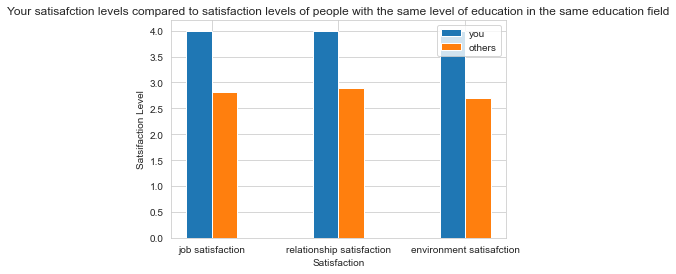

In [3]:
class EducationExperienceStatApp:
    def __init__ (self):
        self.df = pd.read_csv('../dataset-normalized.csv')
        self.education_fields = self.df['EducationField'].unique()
        self.education_levels = self.df['Education'].unique()
        self.min_salary = self.df['MonthlyIncome'].min()
        self.max_salary = self.df['MonthlyIncome'].max()
        self.job_roles = self.df['JobRole'].unique()
        self.job_levels = self.df['JobLevel'].unique()
        self.min_satisfaction = 1
        self.max_satisfaction = 5
        
        self.min_years_in_current_role = self.df['YearsInCurrentRole'].min()
        self.max_years_in_current_role = self.df['YearsInCurrentRole'].max()
        self.min_years_at_company = self.df['YearsAtCompany'].min()
        self.max_years_at_company = self.df['YearsAtCompany'].max()
        self.departments = self.df['Department'].unique()

        self.education = EducationPlots(self.df)
        self.experience = ExperiencePlots(self.df)
        
        self.state = {
            'salarySlider': None,
            'jobRoleDropdown': None,
            'jobLevelDropdown': None,
            'jobSatisfactionSlider': None,
            'relSatisfactionSlider': None,
            'envSatisfactionSlider': None,
            'yearsInCurrentRoleSlider': None,
            'yearsAtCompanySlider': None,
            'departmentDropdown': None,
            'educationFieldDropdown': None,
            'educationLevelDropdown': None
        }
        
        self.layout = {
            'salarySlider': None,
            'jobRoleDropdown': None,
            'jobLevelDropdown': None,
            'jobSatisfactionSlider': None,
            'relSatisfactionSlider': None,
            'envSatisfactionSlider': None,
            'yearsInCurrentRoleSlider': None,
            'yearsAtCompanySlider': None,
            'departmentDropdown': None,
            'educationFieldDropdown': None,
            'educationLevelDropdown': None,
            'btnPlotSalary': None,
            'btnPlotJobLevel': None,
            'btnPlotAttrition': None,
            'btnPlotOvertime': None,
            'btnPlotSatisfaction': None,
            'btn_plot_satisfaction_years_in_curr_role_dep': None, # ahh idc
            'btn_plot_years_in_curr_role_position_salary_pos': None,
            'btn_plot_satisfaction_years_in_curr_role_position': None,
            'btn_plot_current_role_overtime_position': None,
            'btn_plot_years_at_comp_salary_pos': None,
            'btn_plot_years_at_comp_job_level_pos': None,
            'btn_plot_satisfaction_years_at_comp_pos': None,
            'btn_plot_years_at_comp_overtime_pos': None
        }
        
    def find_layout_element (self, target):
        for key, value in self.layout.items():
            if value == target:
                return key
    
    def handle_change (self, data):
        target = self.find_layout_element(data.owner)
        
        if target is not None:
            self.state[target] = data.new
            
    def plot_education_salary(self, _data):
        self.render()
        self.education.plot_education_salary(
            self.state['salarySlider'],
            self.state['educationFieldDropdown'],
            self.state['educationLevelDropdown']
        )
        
    def plot_education_job_level (self, _data):
        self.render()
        self.education.plot_education_job_level(
            self.state['jobLevelDropdown'],
            self.state['educationFieldDropdown'],
            self.state['educationLevelDropdown']
        )
        
    def plot_education_attrition (self, _data):
        self.render()
        self.education.plot_education_attrition(
            self.state['educationFieldDropdown'],
            self.state['educationLevelDropdown']
        )
        
    def plot_education_overtime (self, _data):
        self.render()
        self.education.plot_education_overtme(
            self.state['educationFieldDropdown'],
            self.state['educationLevelDropdown']
        )
        
    def plot_satisfaction_education (self, _data):
        self.render()
        self.education.plot_satisfaction_education(
            self.state['jobSatisfactionSlider'],
            self.state['relSatisfactionSlider'],
            self.state['envSatisfactionSlider'],
            self.state['educationFieldDropdown'],
            self.state['educationLevelDropdown']
        )
        
    def plot_satisfaction_years_in_curr_role_dep (self, _data):
        self.render()
        self.experience.plot_satisfaction_years_in_curr_role_dep(
            self.state['jobSatisfactionSlider'],
            self.state['relSatisfactionSlider'],
            self.state['envSatisfactionSlider'],
            self.state['yearsInCurrentRoleSlider'],
            self.state['departmentDropdown']
        )
        
    def plot_years_in_curr_role_position_salary_pos (self, _data):
        self.render()
        self.experience.plot_years_in_curr_role_position_salary_pos(
            self.state['salarySlider'],
            self.state['yearsInCurrentRoleSlider'],
            self.state['jobRoleDropdown']
        )
        
    def plot_satisfaction_years_in_curr_role_position (self, _data):
        self.render()
        self.experience.plot_satisfaction_years_in_curr_role_position(
            self.state['jobSatisfactionSlider'],
            self.state['relSatisfactionSlider'],
            self.state['envSatisfactionSlider'],
            self.state['yearsInCurrentRoleSlider'],
            self.state['jobRoleDropdown']
        )
        
    def plot_current_role_overtime_position (self, _data):
        self.render()
        self.experience.plot_current_role_overtime_position(
            self.state['jobRoleDropdown'],
            self.state['yearsInCurrentRoleSlider']
        )
        
    def plot_years_at_comp_salary_pos (self, _data):
        self.render()
        self.experience.plot_years_at_comp_salary_pos(
            self.state['salarySlider'],
            self.state['yearsAtCompanySlider'],
            self.state['jobRoleDropdown']
        )
        
    def plot_years_at_comp_job_level_pos (self, _data):
        self.render()
        self.experience.plot_years_at_comp_job_level_pos(
            self.state['jobLevelDropdown'],
            self.state['yearsAtCompanySlider'],
            self.state['jobRoleDropdown']
        )
        
    def plot_satisfaction_years_at_comp_pos (self, _data):
        self.render()
        self.experience.plot_satisfaction_years_at_comp_pos(
            self.state['jobSatisfactionSlider'],
            self.state['relSatisfactionSlider'],
            self.state['envSatisfactionSlider'],
            self.state['yearsAtCompanySlider'],
            self.state['jobRoleDropdown']
        )

    def plot_years_at_comp_overtime_pos (self, _data):
        self.render()
        self.experience.plot_years_at_comp_overtime_pos(
            self.state['jobRoleDropdown'],
            self.state['yearsAtCompanySlider']
        )
    
    def render (self):
        clear_output()
        
        labels = [
            Label('For Salary fill: salary, education field, education level'),
            Label('For Job Level fill: job level, education field, education level'),
            Label('For Attrition fill: education field, education level'),
            Label('For Overtime fill: education field, education level'),
            Label('For Satisfaction fill: job satisfaction, relationship satisfaction, environment satisfaction, education field, education level'),
            Label(''),
            Label(''),
            Label(''),
            Label(''),
            Label(''),
            Label(''),
            Label(''),
            Label('')
        ]
        
        self.layout['educationFieldDropdown'] = Dropdown(
            options=self.education_fields,
            description='Field:',
            value=self.state['educationFieldDropdown']
        )
        
        self.layout['educationLevelDropdown'] = Dropdown(
            options=self.education_levels,
            description='Level:',
            value=self.state['educationLevelDropdown']
        )
        
        self.layout['salarySlider'] = IntSlider(
            value=self.state['salarySlider'],
            min=self.min_salary,
            max=self.max_salary,
            step=1,
            description='Salary:'
        )
        
        self.layout['jobRoleDropdown'] = Dropdown(
            options=self.job_roles,
            description='Job Role:',
            value=self.state['jobRoleDropdown']
        )
        
        self.layout['jobLevelDropdown'] = Dropdown(
            options=self.job_levels,
            description='Job Level:',
            disabled=len(self.job_levels) == 0,
            value=self.state['jobLevelDropdown']
        )
        
        self.layout['jobSatisfactionSlider'] = IntSlider(
            value=self.state['jobSatisfactionSlider'],
            min=self.min_satisfaction,
            max=self.max_satisfaction,
            step=1,
            description='Job Satisfaction:'
        )
        
        self.layout['relSatisfactionSlider'] = IntSlider(
            value=self.state['relSatisfactionSlider'],
            min=self.min_satisfaction,
            max=self.max_satisfaction,
            step=1,
            description='Relationship Satisfaction:'
        )
        
        self.layout['envSatisfactionSlider'] = IntSlider(
            value=self.state['envSatisfactionSlider'],
            min=self.min_satisfaction,
            max=self.max_satisfaction,
            step=1,
            description='Env. Satisfaction:'
        )
        
        self.layout['yearsInCurrentRoleSlider'] = IntSlider(
            value=self.state['yearsInCurrentRoleSlider'],
            min=self.min_years_in_current_role,
            max=self.max_years_in_current_role,
            step=1,
            description='Years in current role:'
        )
        
        self.layout['yearsAtCompanySlider'] = IntSlider(
            value=self.state['yearsAtCompanySlider'],
            min=self.min_years_at_company,
            max=self.max_years_at_company,
            step=1,
            description='Years at company'
        )
        
        self.layout['departmentDropdown'] = Dropdown(
            options=self.departments,
            description='Deparment:',
            disabled=len(self.departments) == 0,
            value=self.state['departmentDropdown']
        )
        
        self.layout['btnPlotSalary'] = Button(
            description='Plot Salary',
            disabled=False,
            button_style='info',
            tooltip='Check salary plot',
            icon='check'
        )
        
        self.layout['btnPlotJobLevel'] = Button(
            description='Plot Job Level',
            disabled=False,
            button_style='info',
            tooltip='Check job level plot',
            icon='check'
        )
        
        self.layout['btnPlotAttrition'] = Button(
            description='Plot Attrition',
            disabled=False,
            button_style='info',
            tooltip='Check attrition plot',
            icon='check'
        )
        
        self.layout['btnPlotOvertime'] = Button(
            description='Plot Overtime',
            disabled=False,
            button_style='info',
            tooltip='Check overtime plot',
            icon='check'
        )
        
        self.layout['btnPlotSatisfaction'] = Button(
            description='Plot Satisfaction',
            disabled=False,
            button_style='info',
            tooltip='Check satisfaction plot',
            icon='check'
        )
        
        self.layout['btn_plot_satisfaction_years_in_curr_role_dep'] = Button(
            description='Plot Satisfaction Years In Cur Role Dep',
            disabled=False,
            button_style='info',
            tooltip='Plot Satisfaction Years In Cur Role Dep',
            icon='check'
        )
        
        self.layout['btn_plot_years_in_curr_role_position_salary_pos'] = Button(
            description='Plot Years In Cur Role Position Salary Pos',
            disabled=False,
            button_style='info',
            tooltip='Plot Years In Cur Role Position Salary Pos',
            icon='check'
        )
        
        self.layout['btn_plot_satisfaction_years_in_curr_role_position'] = Button(
            description='Plot Satisfaction Years In Cur Role Position',
            disabled=False,
            button_style='info',
            tooltip='Plot Satisfaction Years In Cur Role Position',
            icon='check'
        )
        
        self.layout['btn_plot_current_role_overtime_position'] = Button(
            description='Plot Current Role Overtime Position',
            disabled=False,
            button_style='info',
            tooltip='Plot Current Role Overtime Position',
            icon='check'
        )
        
        self.layout['btn_plot_years_at_comp_salary_pos'] = Button(
            description='Plot Years At Comp Salary Pos',
            disabled=False,
            button_style='info',
            tooltip='Plot Years At Comp Salary Pos',
            icon='check'
        )
        
        self.layout['btn_plot_years_at_comp_job_level_pos'] = Button(
            description='Plot Years At Comp Job Level Pos',
            disabled=False,
            button_style='info',
            tooltip='Plot Years At Comp Job Level Pos',
            icon='check'
        )
        
        self.layout['btn_plot_satisfaction_years_at_comp_pos'] = Button(
            description='Plot Satisfaction Years At Comp Pos',
            disabled=False,
            button_style='info',
            tooltip='Plot Satisfaction Years At Comp Pos',
            icon='check'
        )
        
        self.layout['btn_plot_years_at_comp_overtime_pos'] = Button(
            description='Plot Years At Comp Overtime Pos',
            disabled=False,
            button_style='info',
            tooltip='Plot Years At Comp Overtime Pos',
            icon='check'
        )
        
        self.layout['btnPlotSalary'].on_click(self.plot_education_salary)
        self.layout['btnPlotJobLevel'].on_click(self.plot_education_job_level)
        self.layout['btnPlotAttrition'].on_click(self.plot_education_attrition)
        self.layout['btnPlotOvertime'].on_click(self.plot_education_overtime)
        self.layout['btnPlotSatisfaction'].on_click(self.plot_satisfaction_education)
        self.layout['btn_plot_satisfaction_years_in_curr_role_dep'].on_click(self.plot_satisfaction_years_in_curr_role_dep)
        self.layout['btn_plot_years_in_curr_role_position_salary_pos'].on_click(self.plot_years_in_curr_role_position_salary_pos)
        self.layout['btn_plot_satisfaction_years_in_curr_role_position'].on_click(self.plot_satisfaction_years_in_curr_role_position)
        self.layout['btn_plot_current_role_overtime_position'].on_click(self.plot_current_role_overtime_position)
        self.layout['btn_plot_years_at_comp_salary_pos'].on_click(self.plot_years_at_comp_salary_pos)
        self.layout['btn_plot_years_at_comp_job_level_pos'].on_click(self.plot_years_at_comp_job_level_pos)
        self.layout['btn_plot_satisfaction_years_at_comp_pos'].on_click(self.plot_satisfaction_years_at_comp_pos)
        self.layout['btn_plot_years_at_comp_overtime_pos'].on_click(self.plot_years_at_comp_overtime_pos)

        for key in self.layout.keys():
            self.layout[key].observe(self.handle_change, names='value')
        
        layout = []
        labels_i = 0
        
        for key in self.layout.keys():
            layout.append(self.layout[key])
            
            if key.startswith('btn'):
                layout.append(labels[labels_i])
                labels_i += 1

        display(*layout)
        
        display(HTML('''<style>
            .widget-label { min-width: 20ex !important; text-align: left !important; }
        </style>'''))
        
app = EducationExperienceStatApp()

app.render()